<a href="https://colab.research.google.com/github/lcalderon-aceituno/PS353-SP22-HW/blob/main/HW3_5_49_Advanced_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.49 Find $a_n$ and $b_n$ for the function shown in figure 5.28(a). Make a plot comparing the function itself with the first couple terms in the Fourier series, and another for the first 6 or so terms.

In [ ]:
from sympy import *
from sympy.plotting import plot
from sympy import And

Create Fourier series approximation of 
$$
  f(t) = \begin{cases} |t + 1| & -2 < t < 0 \\ |t - 1| & 0 < t < 2 \end{cases}
$$

In [ ]:
var('t') # create variable t
f = Piecewise( (abs(t + 1), And(-2 < t, t<0)), (abs(t - 1), And(0 < t, t<2)))
f

Piecewise((Abs(t + 1), (t > -2) & (t < 0)), (Abs(t - 1), (t > 0) & (t < 2)))

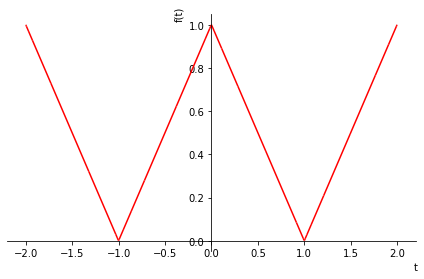

In [ ]:
fig1 = plot(f, line_color="red",label="exact"); # create a plot of the graph to check it matches the problem given 

## calculating $a_0$

In [ ]:
T = 2 # period 
a0 = integrate(1/T*f, (t, -T/2, T/2)) # calculate a0
a0

0.500000000000000

## calculating $a_n$

In [ ]:
var('n', integer = True, positive = True) # create variable n 
omega = 2*pi/T # define w

def a(n):
    return integrate(2/T*cos(n*omega*t)*f, (t, -T/2, T/2))
a(n).simplify()

2.0*(1 - (-1)**n)/(pi**2*n**2)

## calculating $b_n$

In [ ]:
def b(n):
  return integrate(2/T*sin(n*omega*t)*f, (t, -T/2, T/2))
b(n).simplify()

0

In [ ]:
# this function as seen in "PS 353 - Fourier Series Example 1.ipynb"
def f_approx(nmax, t):
  f_sym = a0 + Sum(a(n)*cos(n*omega*t) + b(n)*sin(n*omega*t), (n, 1, nmax))
  return f_sym.doit()

# Plots

## n = 2

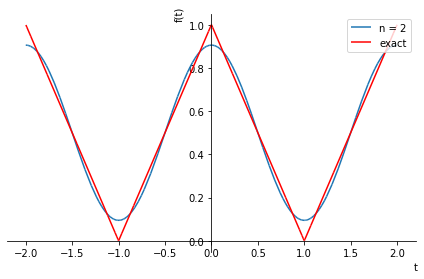

In [ ]:
fig2 = plot(f_approx(2,t), (t, -T, T), show = False, label="n = 2") # test with a couple terms 
fig2.legend = True
fig2.extend(fig1)
fig2.show()

## n = 6

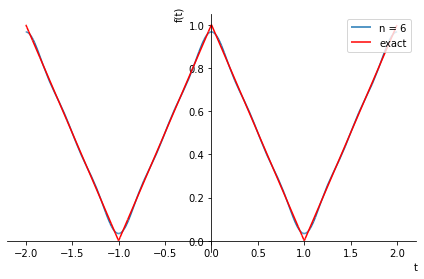

In [ ]:
fig3 = plot(f_approx(6,t), (t, -T, T), show = False, label="n = 6") # test with first 6 terms 
fig3.legend = True
fig3.extend(fig1)
fig3.show()